In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
df=pd.read_csv('data.csv',sep=';')
df.columns=df.columns.str.strip()  # remove whitespace from column names
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [46]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [47]:
df.duplicated().sum()

np.int64(0)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

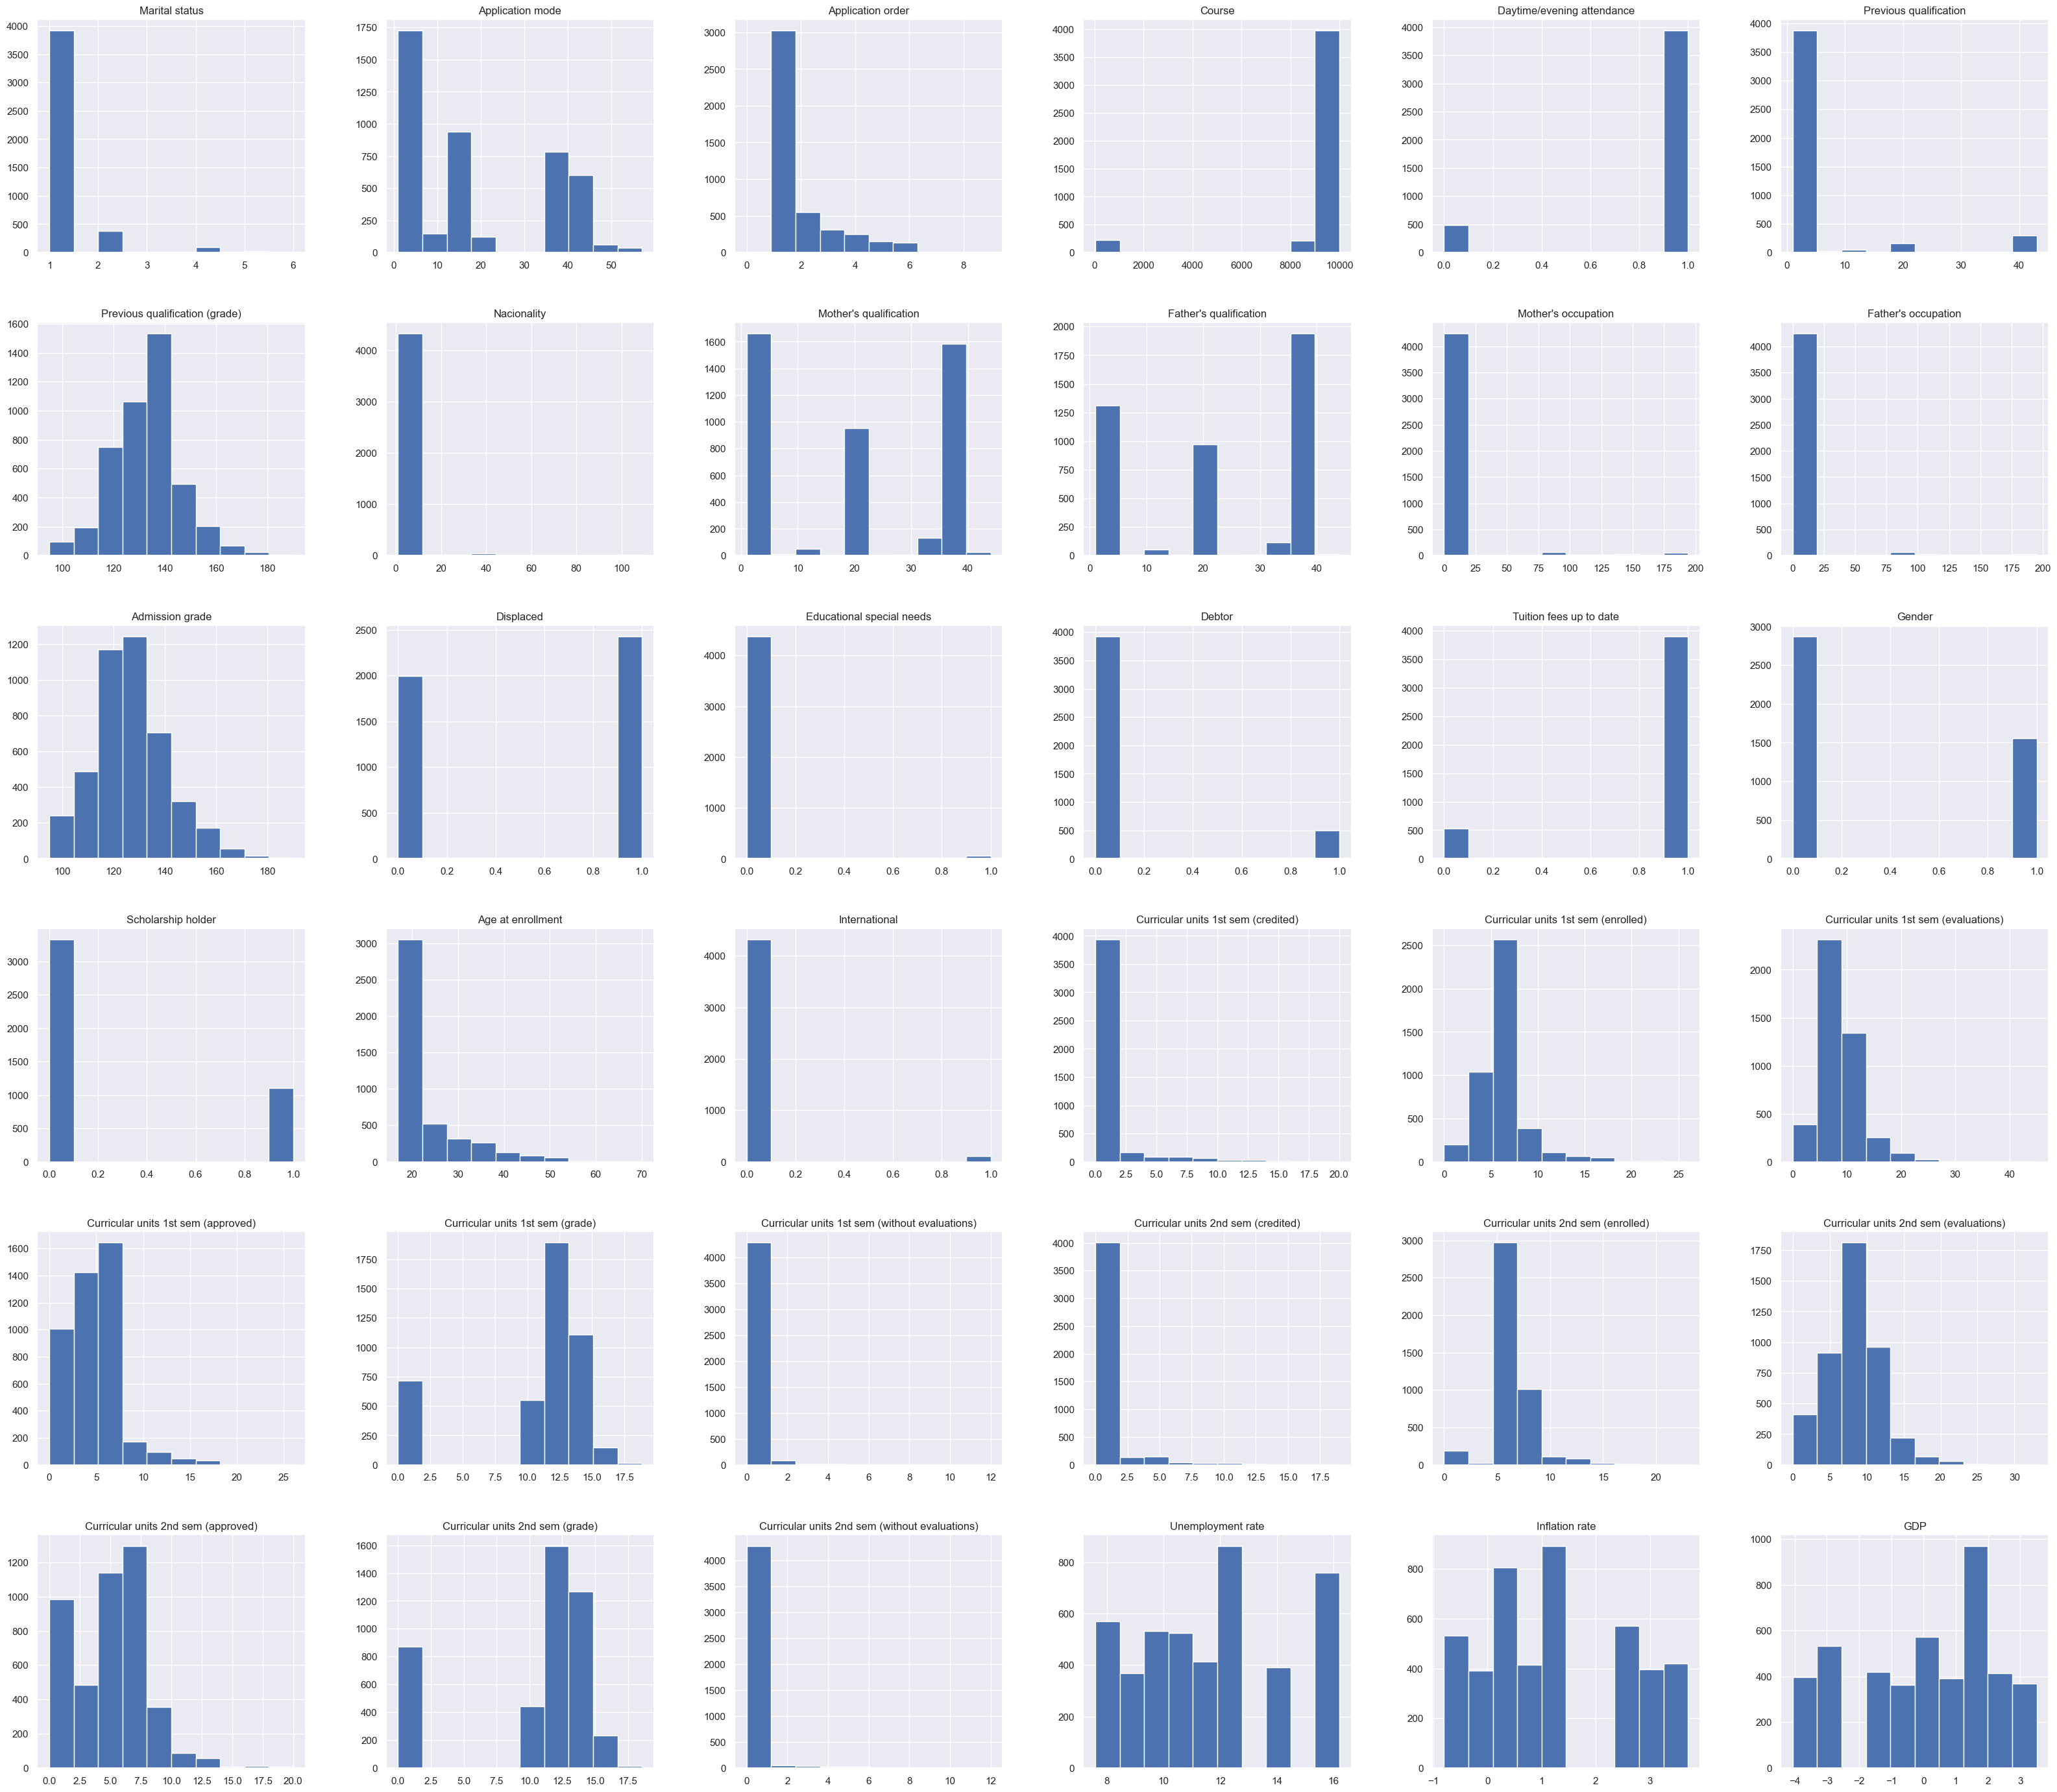

In [49]:
sns.set_theme(style='darkgrid')
df.hist(bins=10,figsize=(40,35),grid=True)
plt.show()

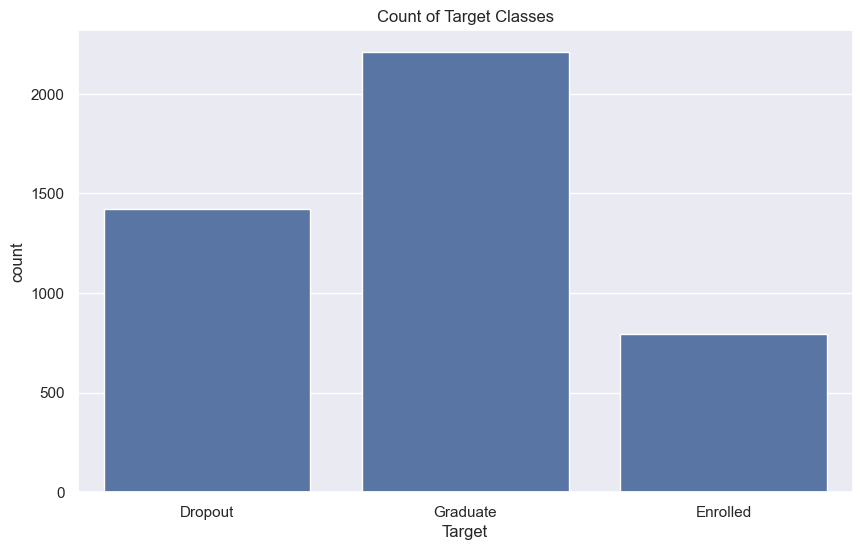

In [50]:
sns.countplot(x=df['Target'])
plt.title('Count of Target Classes')
plt.show()

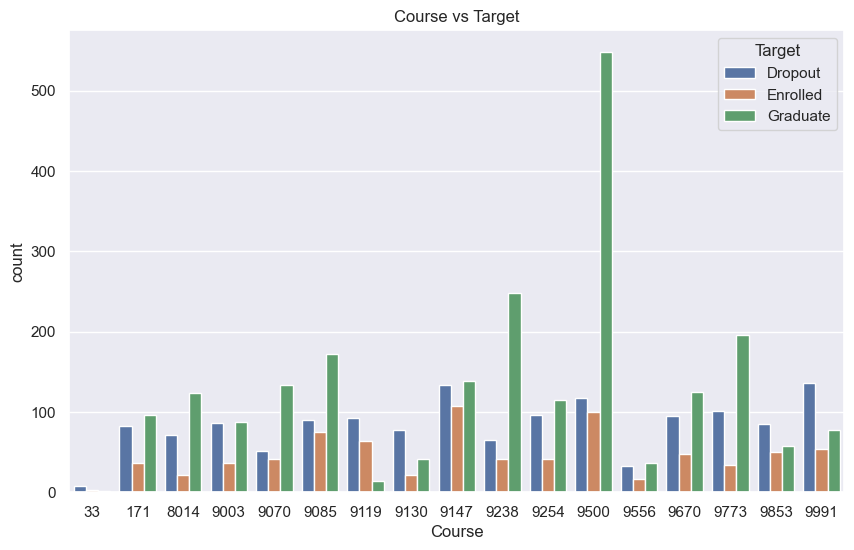

In [51]:
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(x=df['Course'], hue=df['Target'])
plt.title('Course vs Target')
plt.show()

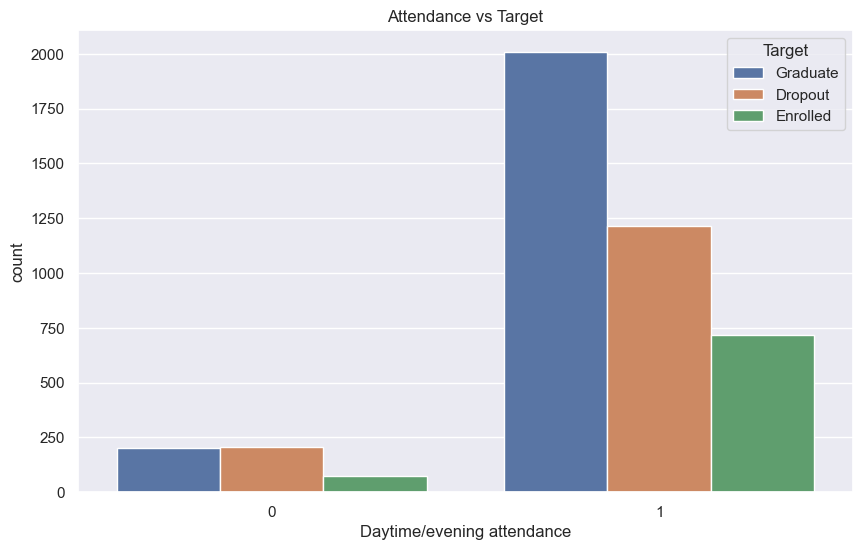

In [52]:
sns.countplot(x=df['Daytime/evening attendance'], hue=df['Target'])
plt.title('Attendance vs Target')
plt.show()

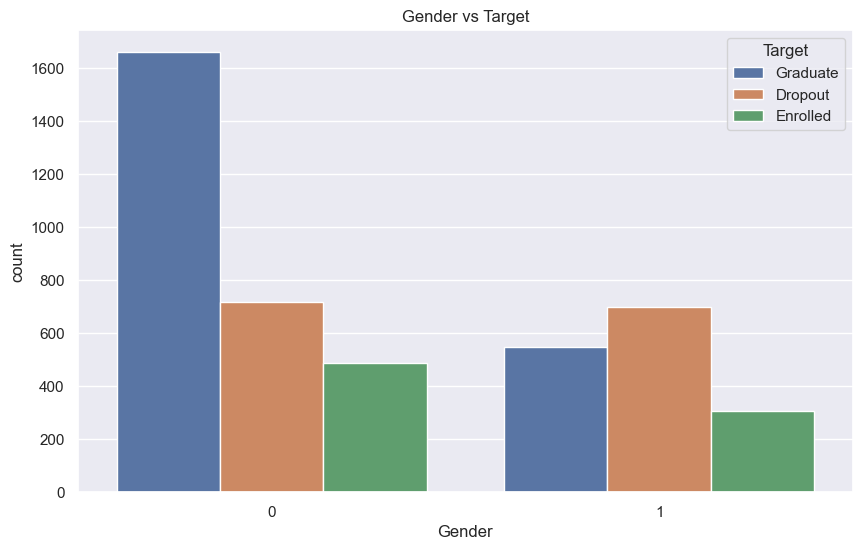

In [53]:
sns.countplot(x=df['Gender'], hue=df['Target'])
plt.title('Gender vs Target')
plt.show()

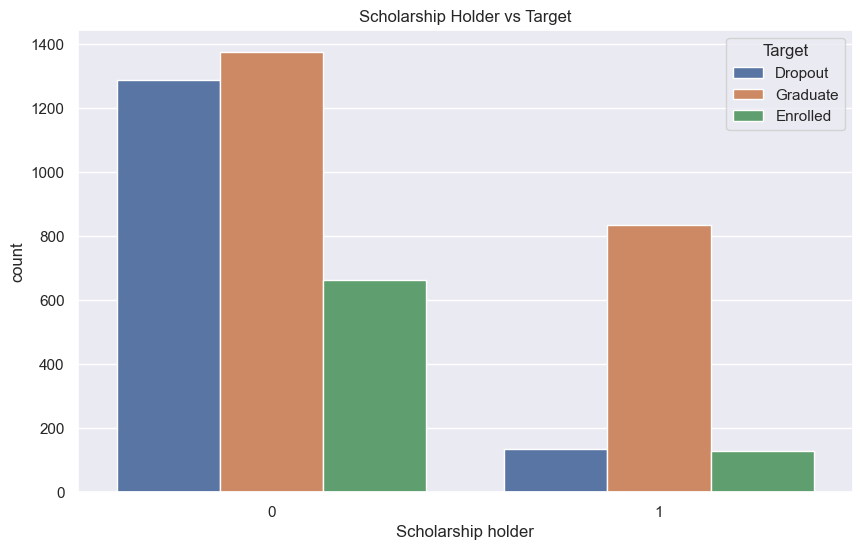

In [54]:
sns.countplot(x=df['Scholarship holder'], hue=df['Target'])
plt.title('Scholarship Holder vs Target')
plt.show()

In [55]:
df = df[df['Target'] != 'Enrolled'].copy()
df['Target'] = df['Target'].map({'Dropout':1, 'Graduate':0})
X = df.drop(columns=['Target'])
y = df['Target']

1. Logistic regression

In [56]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=10)

In [57]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [58]:
train_acclo = logreg.score(X_train, y_train)
test_acclo = logreg.score(X_test, y_test)
print(f"Logistic Regression (before tuning) - Train Accuracy: {train_acclo:.4f}, Test Accuracy: {test_acclo:.4f}")

Logistic Regression (before tuning) - Train Accuracy: 0.9129, Test Accuracy: 0.9284


using lineargridsearch on logistic regression

In [59]:
param_grid_log = {
    'C':      [0.01, 0.1, 1, 10],
    'penalty':['l2'],            # 'l1' requires solver='liblinear'
    'solver': ['lbfgs','liblinear'],
}
grid_log = GridSearchCV(LogisticRegression(max_iter=1000,random_state=42), param_grid_log, cv=5, n_jobs=-1,verbose=1)
grid_log.fit(X_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear']},
             verbose=1)

In [60]:
best_log = grid_log.best_estimator_
train_acc_tunedlo=best_log.score(X_train, y_train)
test_acc_tunedlo=best_log.score(X_test, y_test)
print(f"Logistic Regression (after tuning) - Train Accuracy: {train_acc_tunedlo:.4f}, Test Accuracy: {test_acc_tunedlo:.4f}")

Logistic Regression (after tuning) - Train Accuracy: 0.9129, Test Accuracy: 0.9284


2. SVM

In [61]:
svm = SVC()
svm.fit(X_train, y_train)


SVC()

In [62]:
train_accsvm = svm.score(X_train, y_train)
test_accsvm = svm.score(X_test, y_test)
print(f"SVM (before tuning) - Train Accuracy: {train_accsvm:.4f}, Test Accuracy: {test_accsvm:.4f}")


SVM (before tuning) - Train Accuracy: 0.9342, Test Accuracy: 0.9270


using lineargrid search

In [63]:
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, n_jobs=-1)
grid_svm.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [64]:
best_svm = grid_svm.best_estimator_
train_acc_tunedsvm = best_svm.score(X_train, y_train)
test_acc_tunedsvm = best_svm.score(X_test, y_test)
print(f"SVM (after tuning) - Train Accuracy: {train_acc_tunedsvm:.4f}, Test Accuracy: {test_acc_tunedsvm:.4f}")

SVM (after tuning) - Train Accuracy: 0.9098, Test Accuracy: 0.9325


3. DT

In [65]:
dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=10)

In [66]:
train_accdt= dt.score(X_train, y_train)
test_accdt = dt.score(X_test, y_test)
print(f"Decision Tree (before tuning) - Train Accuracy: {train_accdt:.4f}, Test Accuracy: {test_accdt:.4f}")

Decision Tree (before tuning) - Train Accuracy: 1.0000, Test Accuracy: 0.8760


using lineargridsearch here

In [67]:
param_grid_dt = {'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, None]}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=10), param_grid_dt, cv=5, n_jobs=-1)
grid_dt.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=10), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, None]})

In [68]:
best_dt = grid_dt.best_estimator_
train_acc_tuneddt = best_dt.score(X_train, y_train)
test_acc_tuneddt = best_dt.score(X_test, y_test)
print(f"Decision Tree (after tuning) - Train Accuracy: {train_acc_tuneddt:.4f}, Test Accuracy: {test_acc_tuneddt:.4f}")

Decision Tree (after tuning) - Train Accuracy: 0.9074, Test Accuracy: 0.9201


4. Random Forest

In [69]:
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=10)

In [70]:
train_accrf = rf.score(X_train, y_train)
test_accrf = rf.score(X_test, y_test)
print(f"Random Forest (before tuning) - Train Accuracy: {train_accrf:.4f}, Test Accuracy: {test_accrf:.4f}")

Random Forest (before tuning) - Train Accuracy: 1.0000, Test Accuracy: 0.9284


Using lineargridsearch here

In [71]:
param_grid_rf={
    'n_estimators':[50,60,100,120,150],
    'max_depth':[2,4,6,8],
    'max_features':[0.2,0.6,1],
    'min_samples_split':[2,4,6],
    'min_samples_leaf':[1,2,4]
}
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf , cv=5, n_jobs=-1)
grid_rf.fit(X_train, y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_features': [0.2, 0.6, 1],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 60, 100, 120, 150]})

In [72]:
best_rf = grid_rf.best_estimator_
train_acc_tunedrf = best_rf.score(X_train, y_train)
test_acc_tunedrf = best_rf.score(X_test, y_test)
print(f"Random Forest (after tuning) - Train Accuracy: {train_acc_tunedrf:.4f}, Test Accuracy: {test_acc_tunedrf:.4f}")

Random Forest (after tuning) - Train Accuracy: 0.9504, Test Accuracy: 0.9256


In [73]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest'],
    'Train Acc (before)': [train_acclo , train_accsvm, train_accdt, train_accrf],
    'Test Acc (before)':  [test_acclo, test_accsvm, test_accdt, test_accrf],
    'Train Acc (after)': [train_acc_tunedlo, train_acc_tunedsvm,train_acc_tuneddt, train_acc_tunedrf],
    'Test Acc (after)':  [test_acc_tunedlo, test_acc_tunedsvm, test_acc_tuneddt, test_acc_tunedrf]
})
results

,Model,Train Acc (before),Test Acc (before),Train Acc (after),Test Acc (after)
0,Logistic Regression,0.912879,0.928375,0.912879,0.928375
1,SVM,0.934229,0.926997,0.909780,0.932507
2,Decision Tree,1.000000,0.876033,0.907369,0.920110
3,Random Forest,1.000000,0.928375,0.950413,0.925620
